In [5]:
import pandas as pd
import numpy as np

In [6]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

[[<matplotlib.axis.XTick at 0x7f6cd38f4588>,

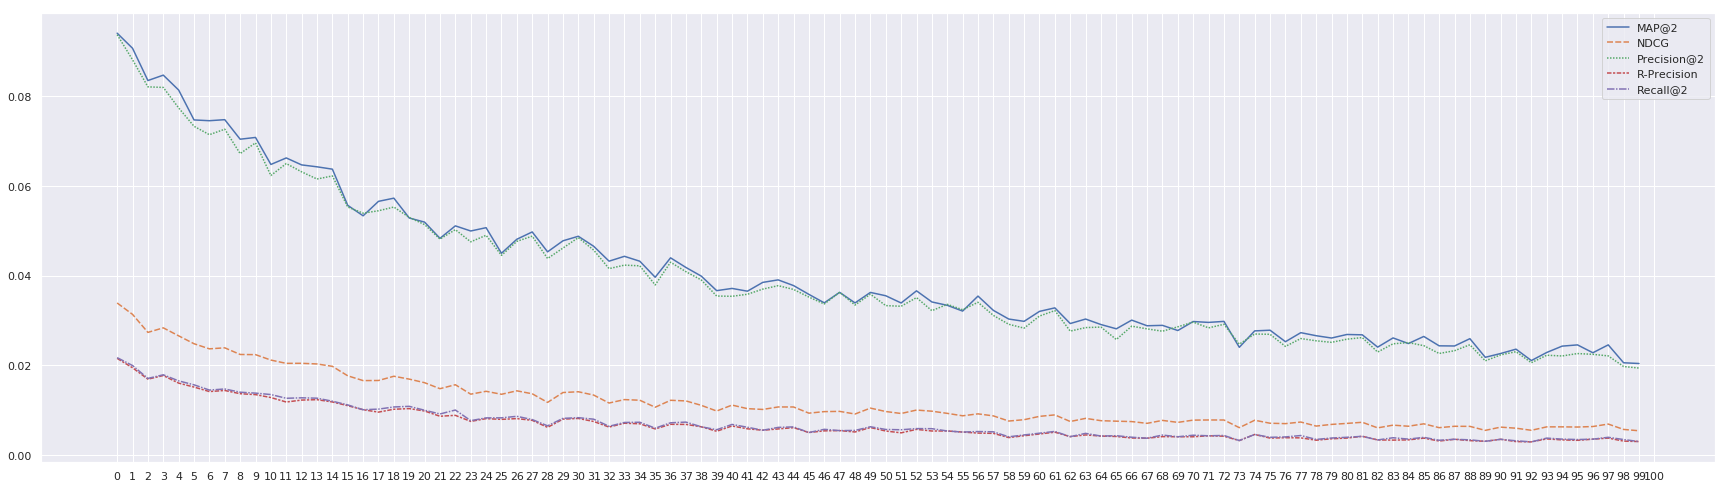

In [7]:
entropy_100_2_df = pd.read_pickle("entropy_100_2_df")
entropy_100_2_df.columns = ["Clicks", "MAP@2", "NDCG", "Precision@2", "R-Precision", "Recall@2"]

entropy_100_2_df['MAP@2'] = entropy_100_2_df['MAP@2'].apply(lambda x: x[0])
entropy_100_2_df['NDCG'] = entropy_100_2_df['NDCG'].apply(lambda x: x[0])
entropy_100_2_df['Precision@2'] = entropy_100_2_df['Precision@2'].apply(lambda x: x[0])
entropy_100_2_df['R-Precision'] = entropy_100_2_df['R-Precision'].apply(lambda x: x[0])
entropy_100_2_df['Recall@2'] = entropy_100_2_df['Recall@2'].apply(lambda x: x[0])
entropy_100_2_df['Clicks'] = entropy_100_2_df['Clicks'].apply(lambda x: x[0])
entropy_100_2_df

fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_100_2_df[["MAP@2", "NDCG", "Precision@2", "R-Precision", "Recall@2"]])
ax.set(xticks=np.arange(0,101,1))

[[<matplotlib.axis.XTick at 0x7f6cd3d53b38>,

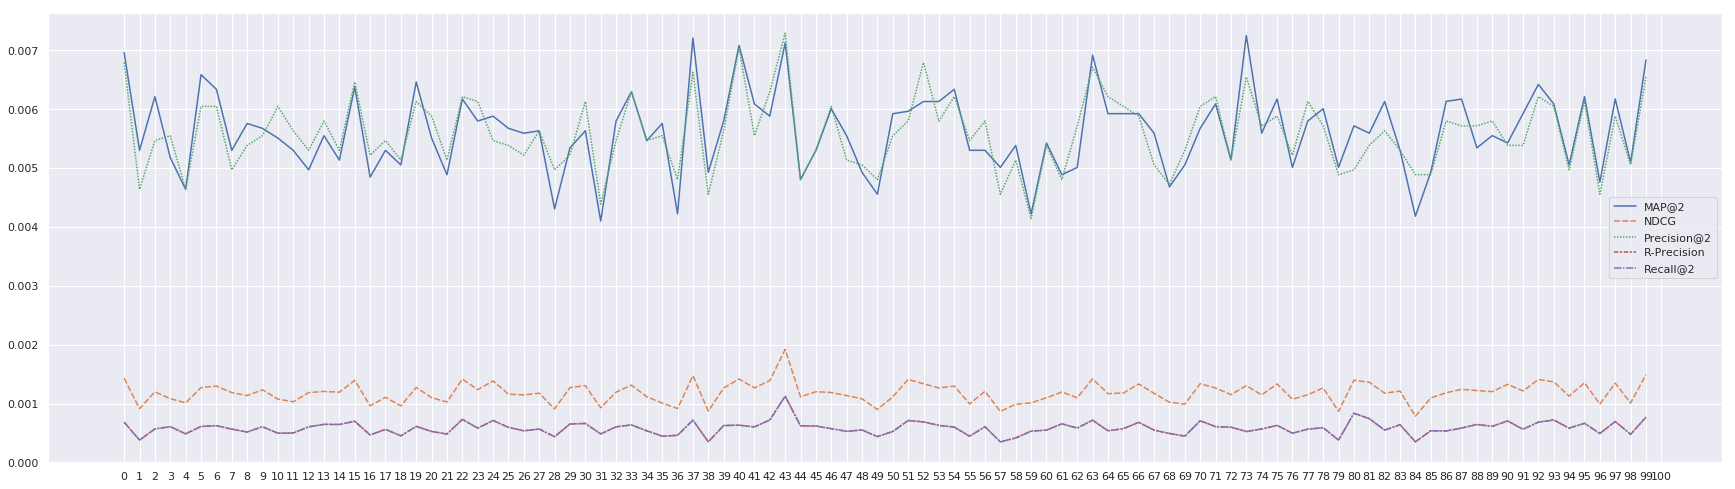

In [8]:
random_100_2_df = pd.read_pickle("random_100_2_df")
random_100_2_df.columns = ["Clicks", "MAP@2", "NDCG", "Precision@2", "R-Precision", "Recall@2"]

random_100_2_df['MAP@2'] = random_100_2_df['MAP@2'].apply(lambda x: x[0])
random_100_2_df['NDCG'] = random_100_2_df['NDCG'].apply(lambda x: x[0])
random_100_2_df['Precision@2'] = random_100_2_df['Precision@2'].apply(lambda x: x[0])
random_100_2_df['R-Precision'] = random_100_2_df['R-Precision'].apply(lambda x: x[0])
random_100_2_df['Recall@2'] = random_100_2_df['Recall@2'].apply(lambda x: x[0])
random_100_2_df['Clicks'] = random_100_2_df['Clicks'].apply(lambda x: x[0])
random_100_2_df

fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=random_100_2_df[["MAP@2", "NDCG", "Precision@2", "R-Precision", "Recall@2"]])
ax.set(xticks=np.arange(0,101,1))

In [9]:
entropy_random_100_2_df = pd.concat([entropy_100_2_df, random_100_2_df], axis=1)
entropy_random_100_2_df.columns = ["entropy_Clicks", "entropy_MAP@2", "entropy_NDCG", "entropy_Precision@2", "entropy_R-Precision", "entropy_Recall@2",
                                  "random_Clicks", "random_MAP@2", "random_NDCG", "random_Precision@2", "random_R-Precision", "random_Recall@2"]
entropy_random_100_2_df

,entropy_Clicks,entropy_MAP@2,entropy_NDCG,entropy_Precision@2,entropy_R-Precision,entropy_Recall@2,random_Clicks,random_MAP@2,random_NDCG,random_Precision@2,random_R-Precision,random_Recall@2
0,4.136690,0.094086,0.033930,0.093755,0.021578,0.021744,4.932731,0.006957,0.001433,0.006791,0.000687,0.000687
1,4.191732,0.090721,0.031392,0.088152,0.019487,0.019984,4.953951,0.005301,0.000916,0.004638,0.000384,0.000384
2,4.245289,0.083527,0.027374,0.082117,0.016946,0.017112,4.946546,0.006212,0.001202,0.005466,0.000574,0.000574
3,4.234091,0.084730,0.028388,0.081992,0.017756,0.017922,4.945138,0.005176,0.001087,0.005549,0.000611,0.000611
4,4.276690,0.081409,0.026608,0.077421,0.016063,0.016562,4.954083,0.004638,0.001015,0.004638,0.000490,0.000490
5,4.316944,0.074742,0.024845,0.073329,0.015184,0.015683,4.940036,0.006584,0.001275,0.006046,0.000615,0.000615
6,4.330311,0.074572,0.023708,0.071452,0.014183,0.014516,4.940898,0.006336,0.001300,0.006046,0.000628,0.000628
7,4.333100,0.074800,0.023933,0.072677,0.014423,0.014756,4.950737,0.005301,0.001190,0.004969,0.000570,0.000570
8,4.370438,0.070447,0.022451,0.067239,0.013704,0.014037,4.947441,0.005756,0.001139,0.005383,0.000520,0.000520
9,4.352919,0.070839,0.022412,0.069630,0.013499,0.013833,4.945039,0.005673,0.001236,0.005549,0.000611,0.000611


[[<matplotlib.axis.XTick at 0x7f194402def0>,

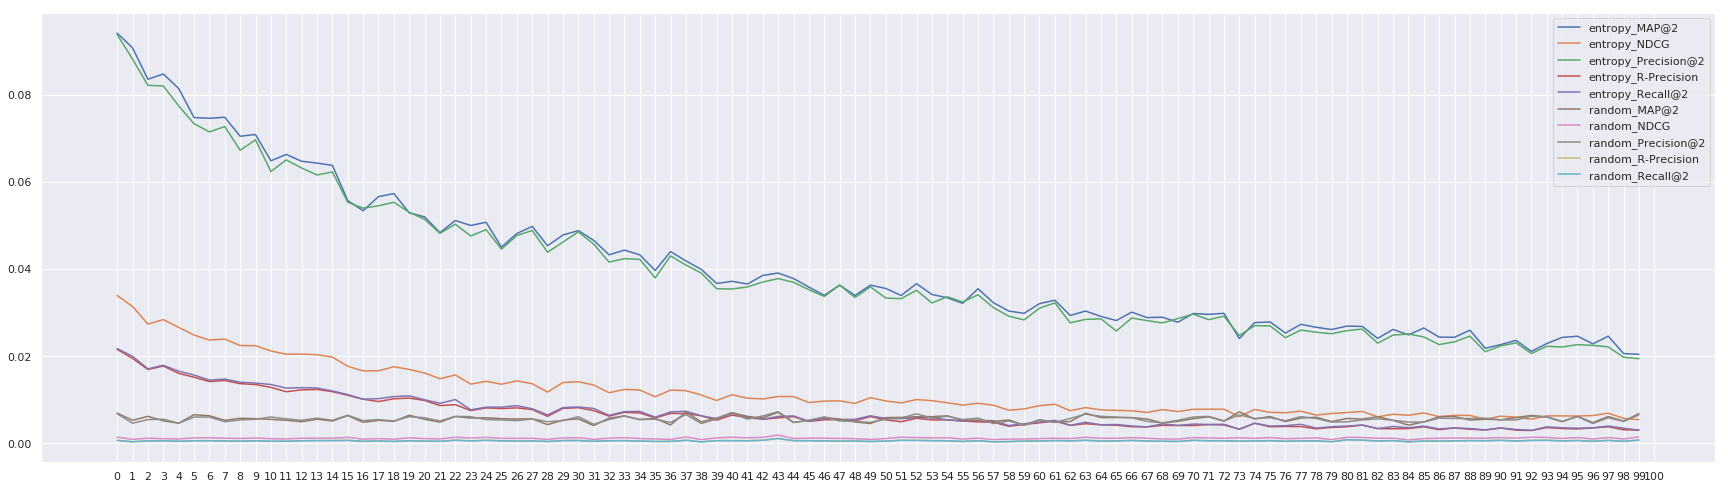

In [94]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_df[["entropy_MAP@2", "entropy_NDCG", "entropy_Precision@2", "entropy_R-Precision", "entropy_Recall@2",
                                                "random_MAP@2", "random_NDCG", "random_Precision@2", "random_R-Precision", "random_Recall@2"]],
                  dashes=False)
ax.set(xticks=np.arange(0,101,1))

# fig.savefig("entropy_random_100times_2items_per_time.png")

[[<matplotlib.axis.XTick at 0x7f193f3c2438>,

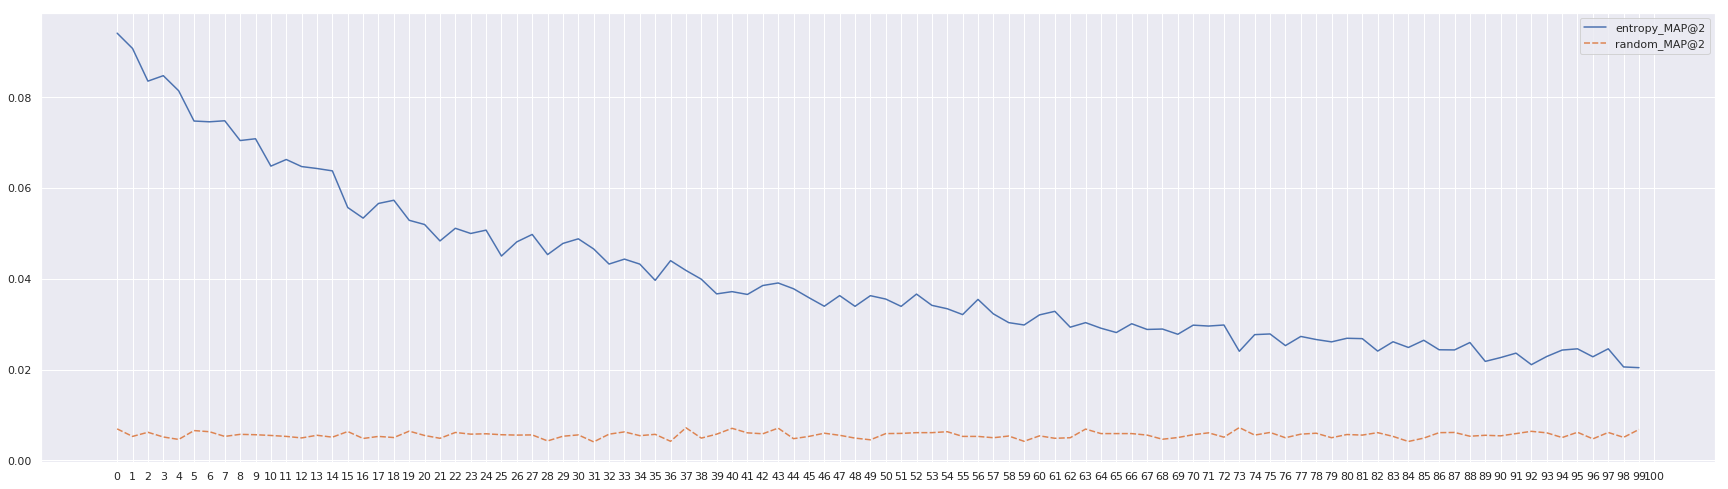

In [95]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_df[["entropy_MAP@2", "random_MAP@2"]])
ax.set(xticks=np.arange(0,101,1))

# fig.savefig("entropy_random_100times_2items_per_time_MAP@2.png")

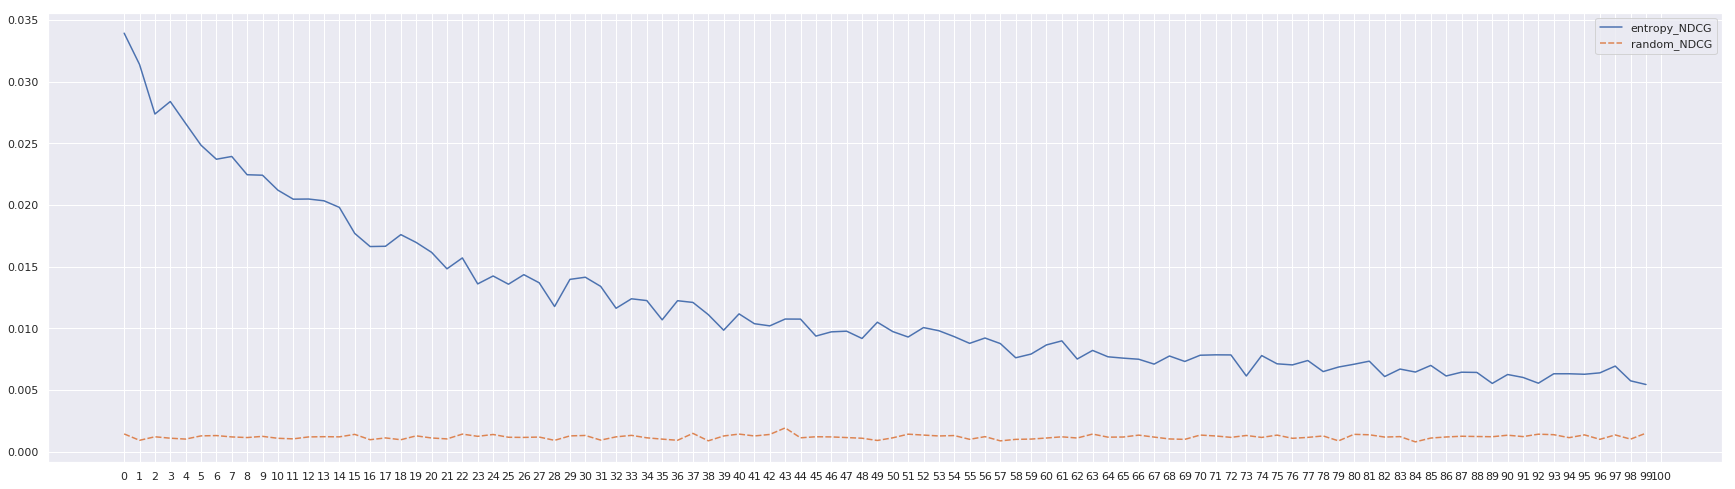

In [98]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_df[["entropy_NDCG", "random_NDCG"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_NDCG.png")

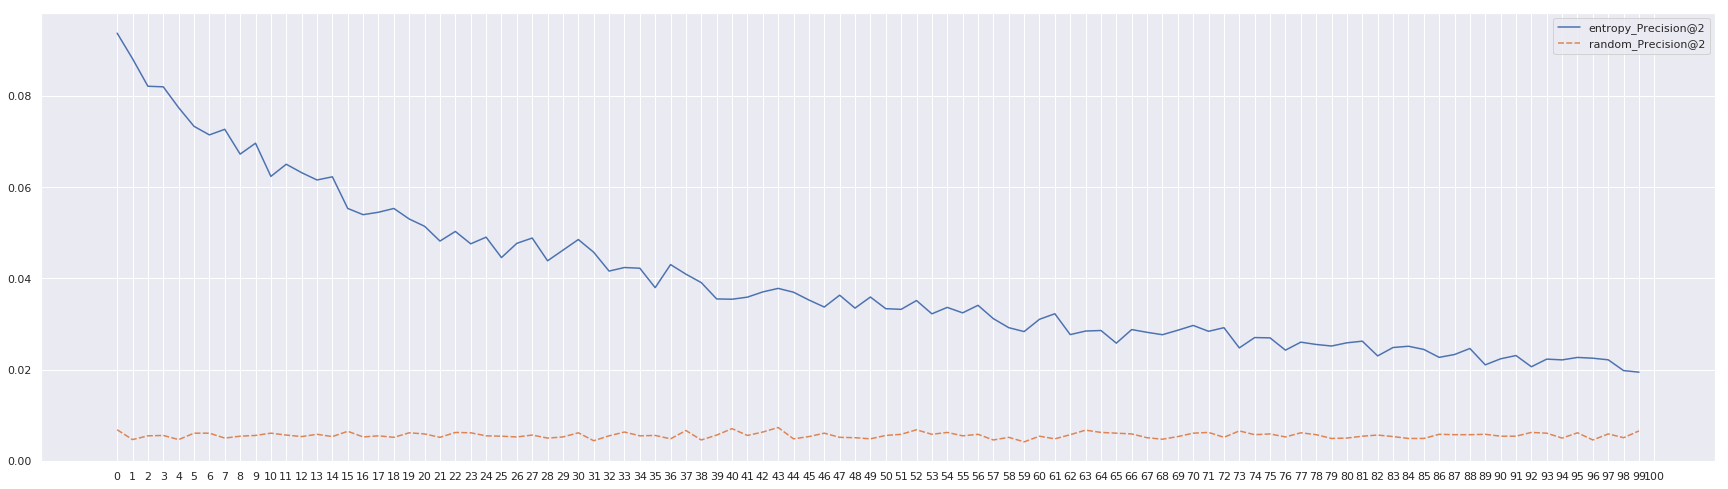

In [100]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_df[["entropy_Precision@2", "random_Precision@2"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_Precision@2.png")

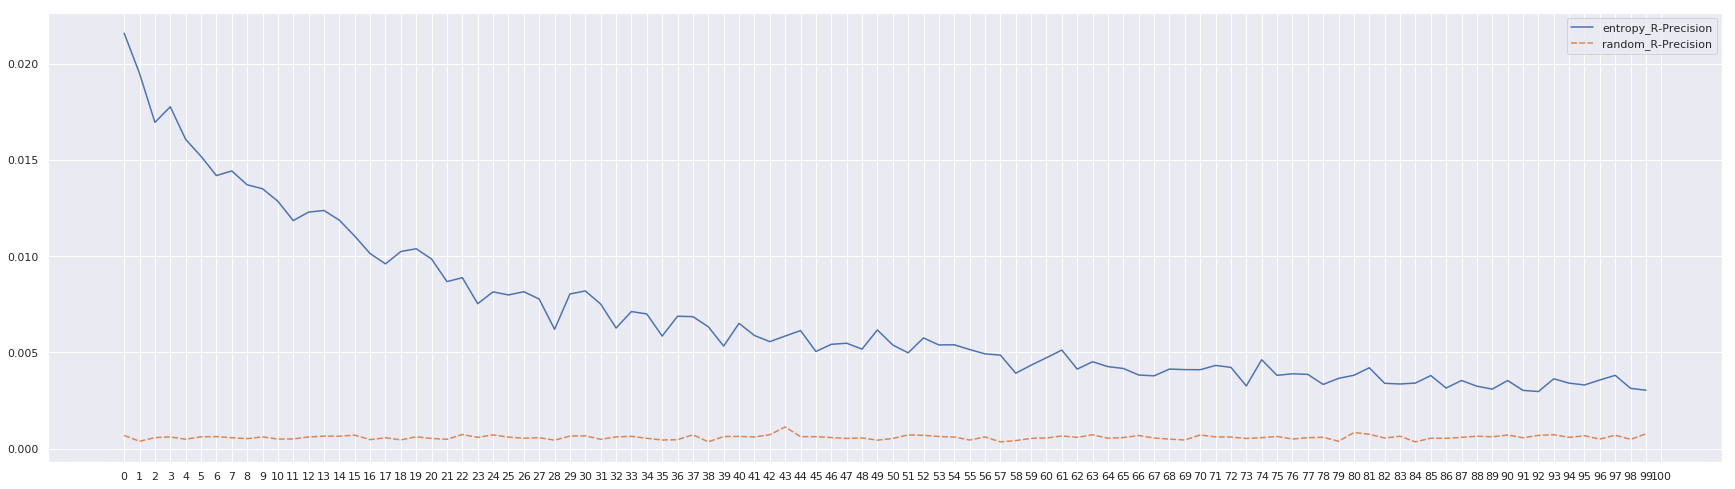

In [101]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_df[["entropy_R-Precision", "random_R-Precision"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_R-Precision.png")

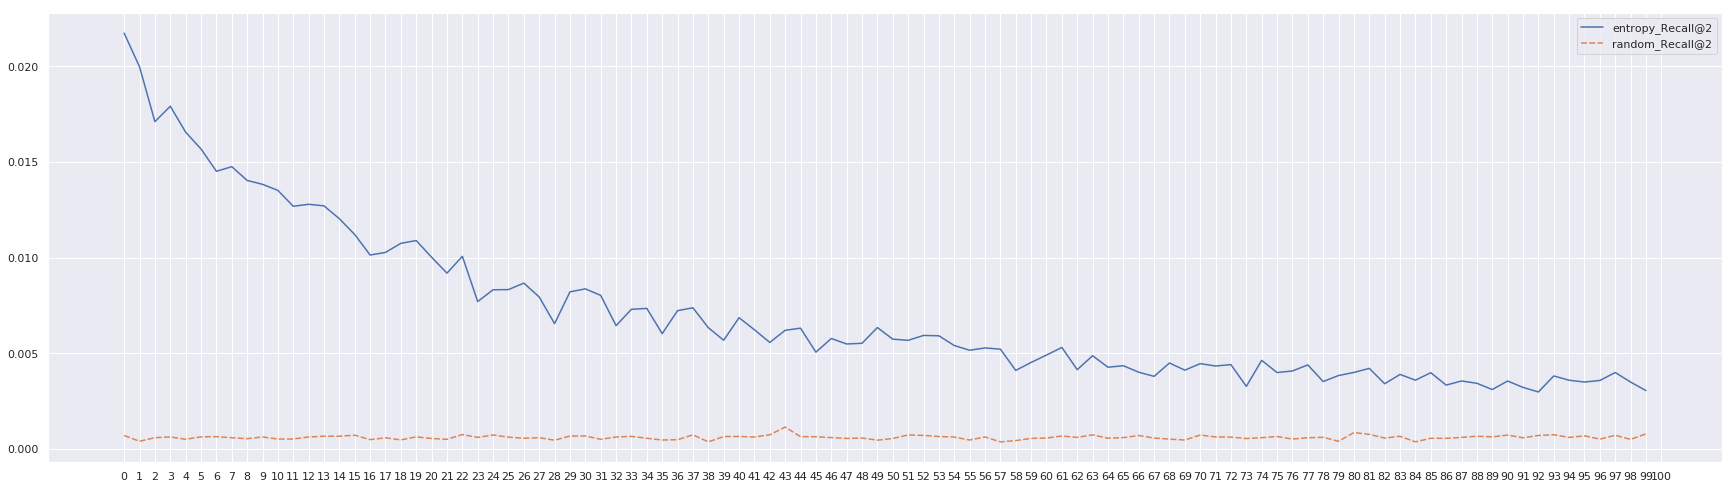

In [104]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_df[["entropy_Recall@2", "random_Recall@2"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_Recall@2.png")

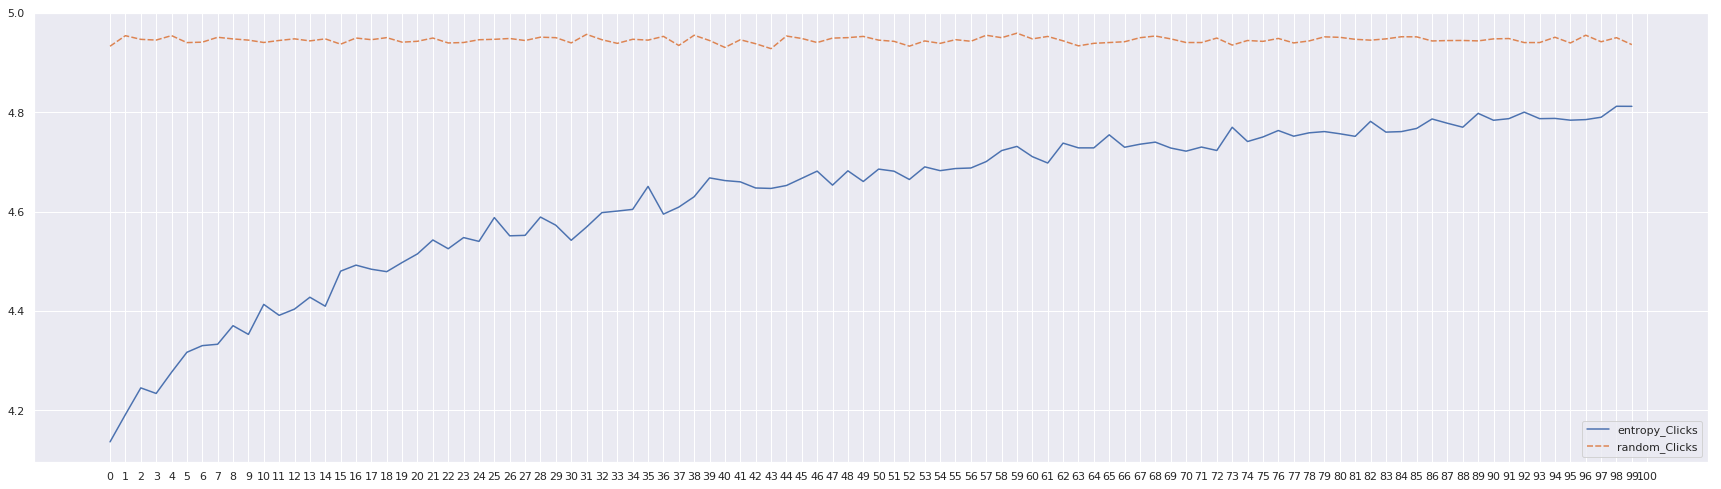

In [105]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_df[["entropy_Clicks", "random_Clicks"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_Clicks.png")

[[<matplotlib.axis.XTick at 0x7f6cd3bad780>,

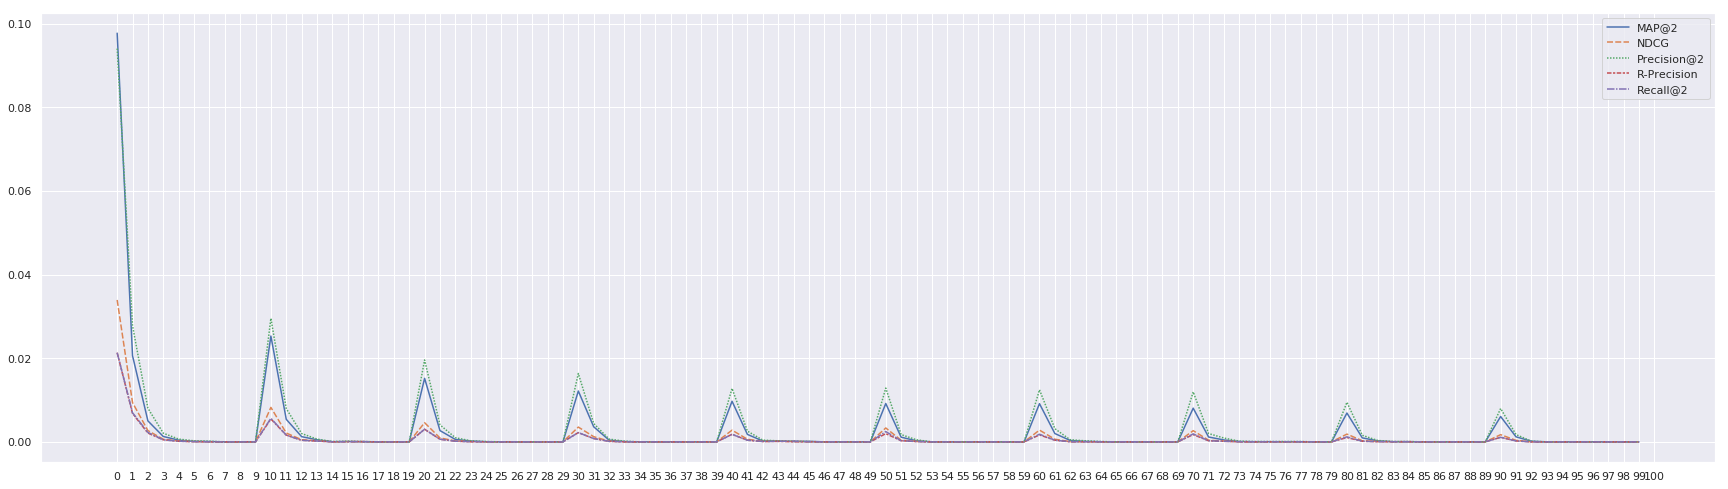

In [10]:
entropy_100_2_retrain_every_10times_df = pd.read_pickle("entropy_100_2_retrain_every_10times_df")
entropy_100_2_retrain_every_10times_df.columns = ["Clicks", "MAP@2", "NDCG", "Precision@2", "R-Precision", "Recall@2"]

entropy_100_2_retrain_every_10times_df['MAP@2'] = entropy_100_2_retrain_every_10times_df['MAP@2'].apply(lambda x: x[0])
entropy_100_2_retrain_every_10times_df['NDCG'] = entropy_100_2_retrain_every_10times_df['NDCG'].apply(lambda x: x[0])
entropy_100_2_retrain_every_10times_df['Precision@2'] = entropy_100_2_retrain_every_10times_df['Precision@2'].apply(lambda x: x[0])
entropy_100_2_retrain_every_10times_df['R-Precision'] = entropy_100_2_retrain_every_10times_df['R-Precision'].apply(lambda x: x[0])
entropy_100_2_retrain_every_10times_df['Recall@2'] = entropy_100_2_retrain_every_10times_df['Recall@2'].apply(lambda x: x[0])
entropy_100_2_retrain_every_10times_df['Clicks'] = entropy_100_2_retrain_every_10times_df['Clicks'].apply(lambda x: x[0])
entropy_100_2_retrain_every_10times_df

fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_100_2_retrain_every_10times_df[["MAP@2", "NDCG", "Precision@2", "R-Precision", "Recall@2"]])
ax.set(xticks=np.arange(0,101,1))

In [11]:
entropy_random_100_2_with_retrain_df = pd.concat([entropy_random_100_2_df, entropy_100_2_retrain_every_10times_df], axis=1)
entropy_random_100_2_with_retrain_df.columns = ["entropy_Clicks", "entropy_MAP@2", "entropy_NDCG", "entropy_Precision@2", "entropy_R-Precision", "entropy_Recall@2",
                                                "random_Clicks", "random_MAP@2", "random_NDCG", "random_Precision@2", "random_R-Precision", "random_Recall@2",
                                                "entropy_Clicks_retrain", "entropy_MAP@2_retrain", "entropy_NDCG_retrain", "entropy_Precision@2_retrain", "entropy_R-Precision_retrain", "entropy_Recall@2_retrain"]
entropy_random_100_2_with_retrain_df

,entropy_Clicks,entropy_MAP@2,entropy_NDCG,entropy_Precision@2,entropy_R-Precision,entropy_Recall@2,random_Clicks,random_MAP@2,random_NDCG,random_Precision@2,random_R-Precision,random_Recall@2,entropy_Clicks_retrain,entropy_MAP@2_retrain,entropy_NDCG_retrain,entropy_Precision@2_retrain,entropy_R-Precision_retrain,entropy_Recall@2_retrain
0,4.136690,0.094086,0.033930,0.093755,0.021578,0.021744,4.932731,0.006957,0.001433,0.006791,0.000687,0.000687,4.131125,0.097689,0.033922,0.094004,0.021309,0.021309
1,4.191732,0.090721,0.031392,0.088152,0.019487,0.019984,4.953951,0.005301,0.000916,0.004638,0.000384,0.000384,4.732345,0.020588,0.009378,0.027755,0.006791,0.006956
2,4.245289,0.083527,0.027374,0.082117,0.016946,0.017112,4.946546,0.006212,0.001202,0.005466,0.000574,0.000574,4.921018,0.005014,0.002697,0.008039,0.002099,0.002264
3,4.234091,0.084730,0.028388,0.081992,0.017756,0.017922,4.945138,0.005176,0.001087,0.005549,0.000611,0.000611,4.980448,0.001285,0.000633,0.002073,0.000492,0.000492
4,4.276690,0.081409,0.026608,0.077421,0.016063,0.016562,4.954083,0.004638,0.001015,0.004638,0.000490,0.000490,4.993483,0.000415,0.000206,0.000663,0.000148,0.000148
5,4.316944,0.074742,0.024845,0.073329,0.015184,0.015683,4.940036,0.006584,0.001275,0.006046,0.000615,0.000615,4.997562,0.000124,0.000069,0.000249,0.000053,0.000053
6,4.330311,0.074572,0.023708,0.071452,0.014183,0.014516,4.940898,0.006336,0.001300,0.006046,0.000628,0.000628,4.998375,0.000083,0.000035,0.000166,0.000021,0.000021
7,4.333100,0.074800,0.023933,0.072677,0.014423,0.014756,4.950737,0.005301,0.001190,0.004969,0.000570,0.000570,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,4.370438,0.070447,0.022451,0.067239,0.013704,0.014037,4.947441,0.005756,0.001139,0.005383,0.000520,0.000520,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,4.352919,0.070839,0.022412,0.069630,0.013499,0.013833,4.945039,0.005673,0.001236,0.005549,0.000611,0.000611,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000


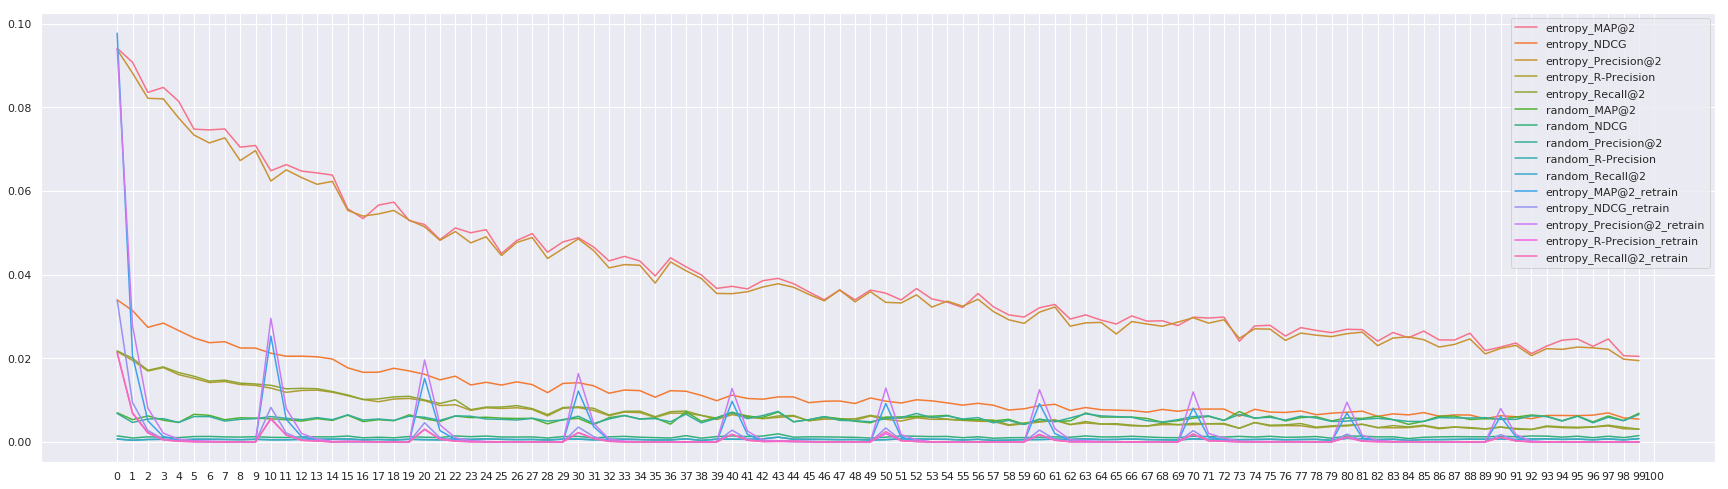

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_with_retrain_df[["entropy_MAP@2", "entropy_NDCG", "entropy_Precision@2", "entropy_R-Precision", "entropy_Recall@2",
                                                             "random_MAP@2", "random_NDCG", "random_Precision@2", "random_R-Precision", "random_Recall@2",
                                                             "entropy_MAP@2_retrain", "entropy_NDCG_retrain", "entropy_Precision@2_retrain", "entropy_R-Precision_retrain", "entropy_Recall@2_retrain"]],
                  dashes=False)
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_with_retrain.png")

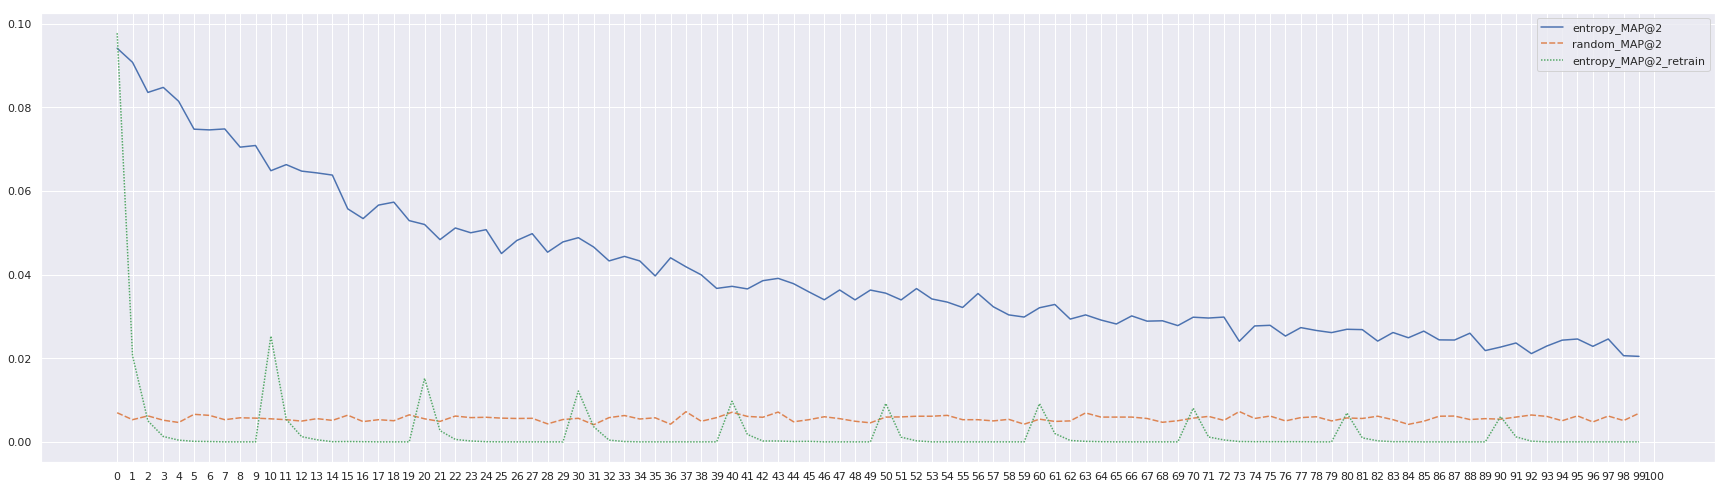

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_with_retrain_df[["entropy_MAP@2", "random_MAP@2", "entropy_MAP@2_retrain"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_MAP@2_with_retrain.png")

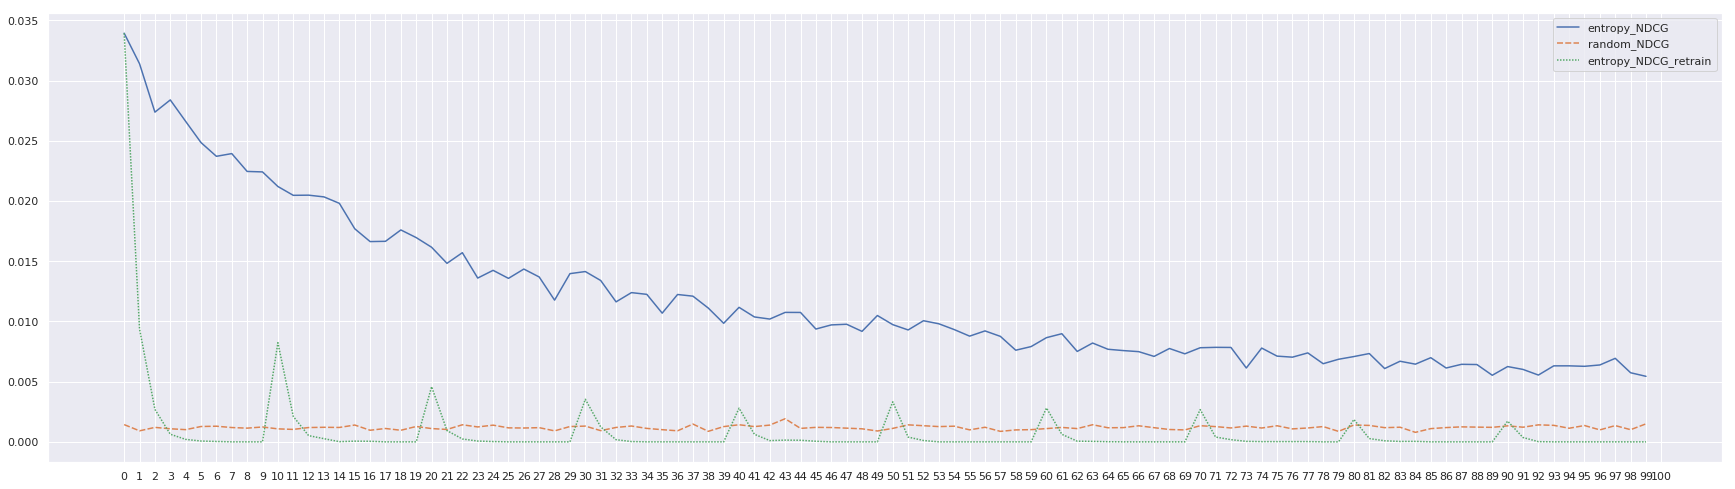

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_with_retrain_df[["entropy_NDCG", "random_NDCG", "entropy_NDCG_retrain"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_NDCG_with_retrain.png")

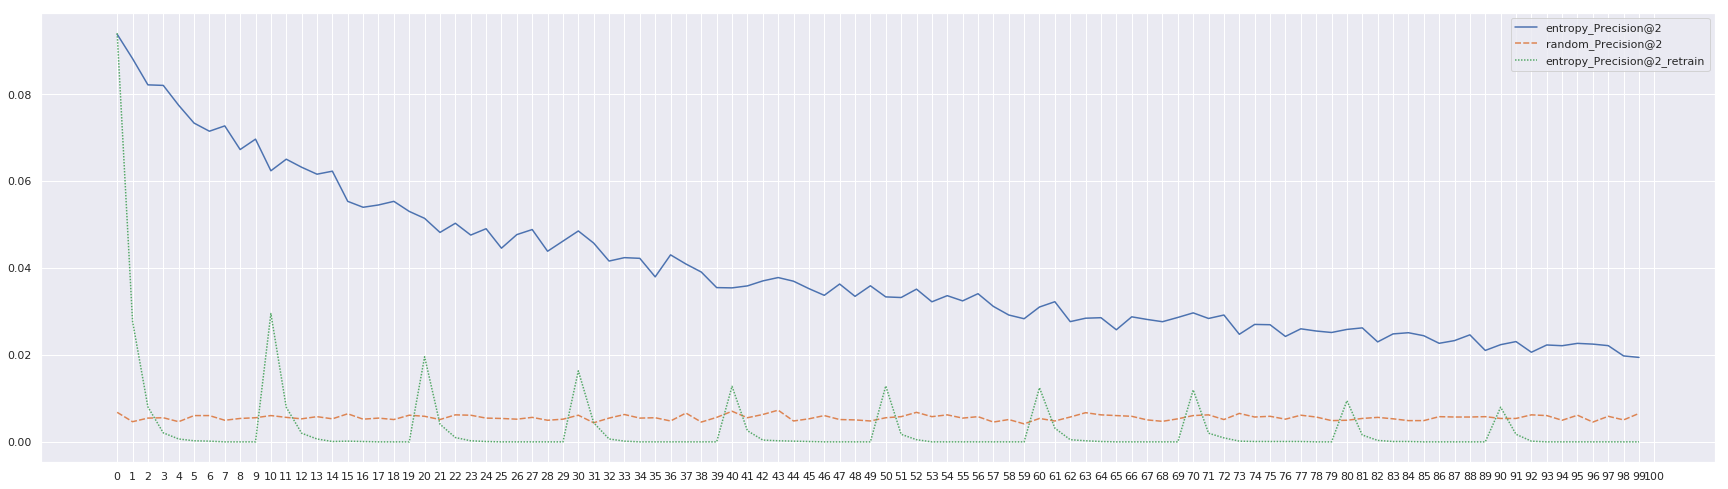

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_with_retrain_df[["entropy_Precision@2", "random_Precision@2", "entropy_Precision@2_retrain"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_Precision@2_with_retrain.png")

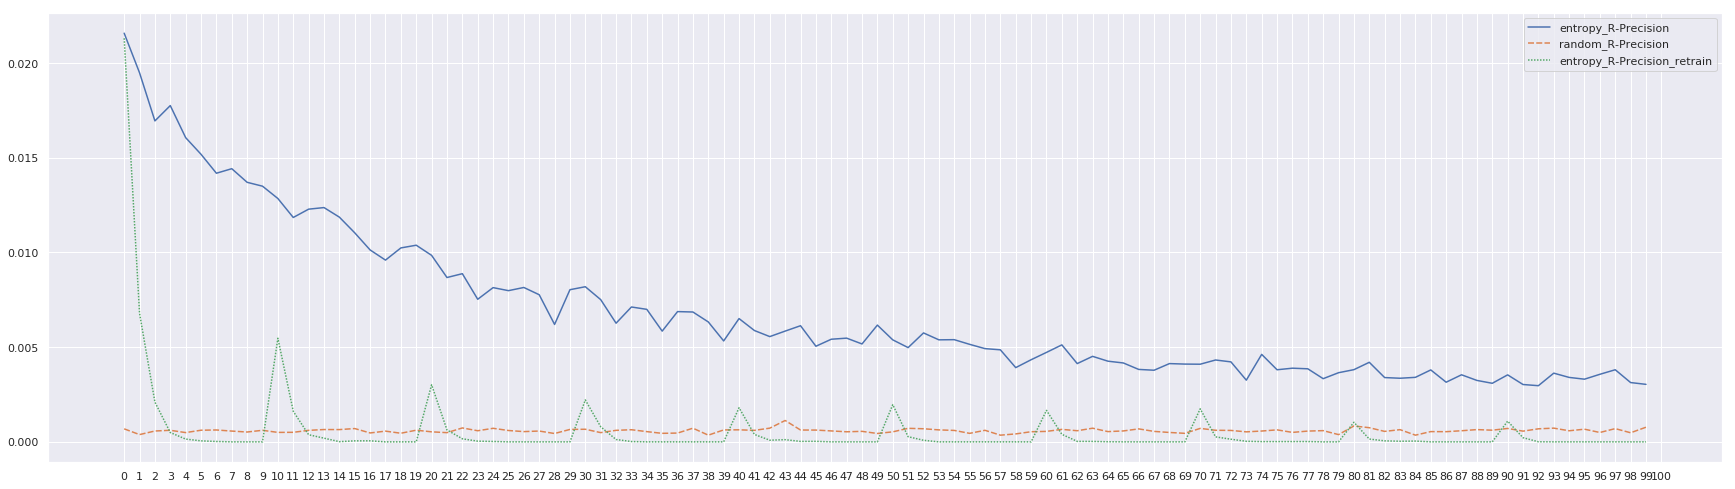

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_with_retrain_df[["entropy_R-Precision", "random_R-Precision", "entropy_R-Precision_retrain"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_R-Precision_with_retrain.png")

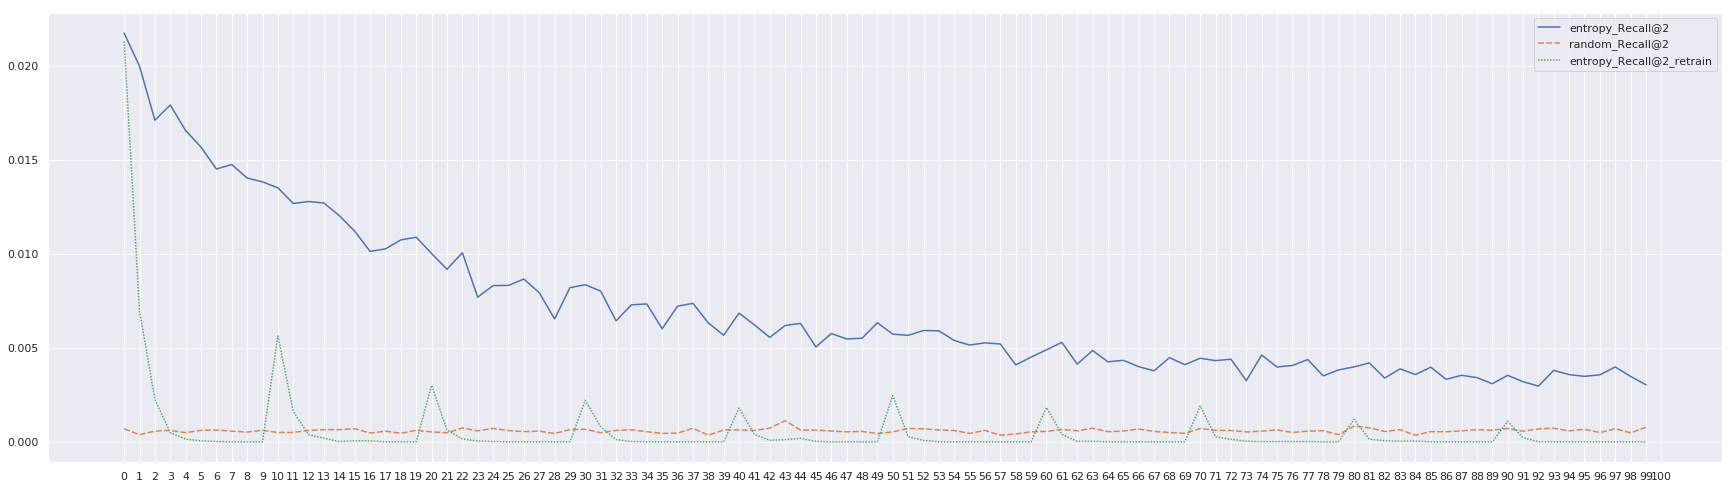

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_with_retrain_df[["entropy_Recall@2", "random_Recall@2", "entropy_Recall@2_retrain"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_Recall@2_with_retrain.png")

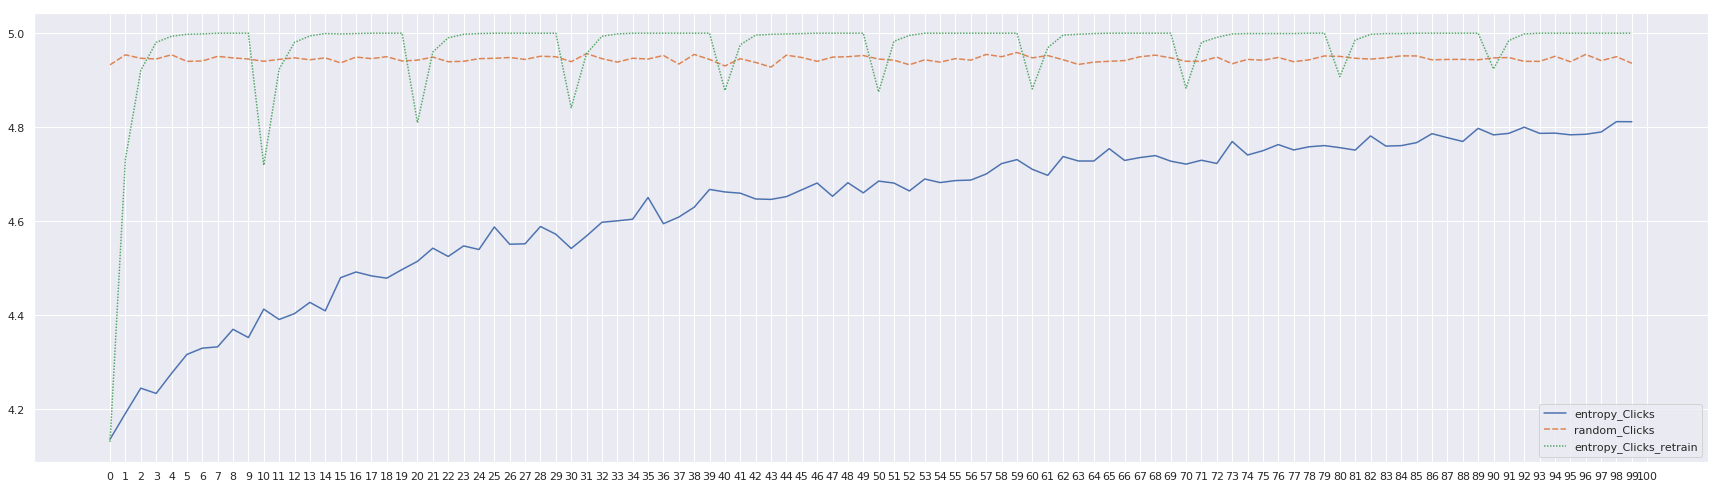

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_random_100_2_with_retrain_df[["entropy_Clicks", "random_Clicks", "entropy_Clicks_retrain"]])
ax.set(xticks=np.arange(0,101,1))

fig.savefig("entropy_random_100times_2items_per_time_Clicks_with_retrain.png")

[[<matplotlib.axis.XTick at 0x7f6cd174bba8>,

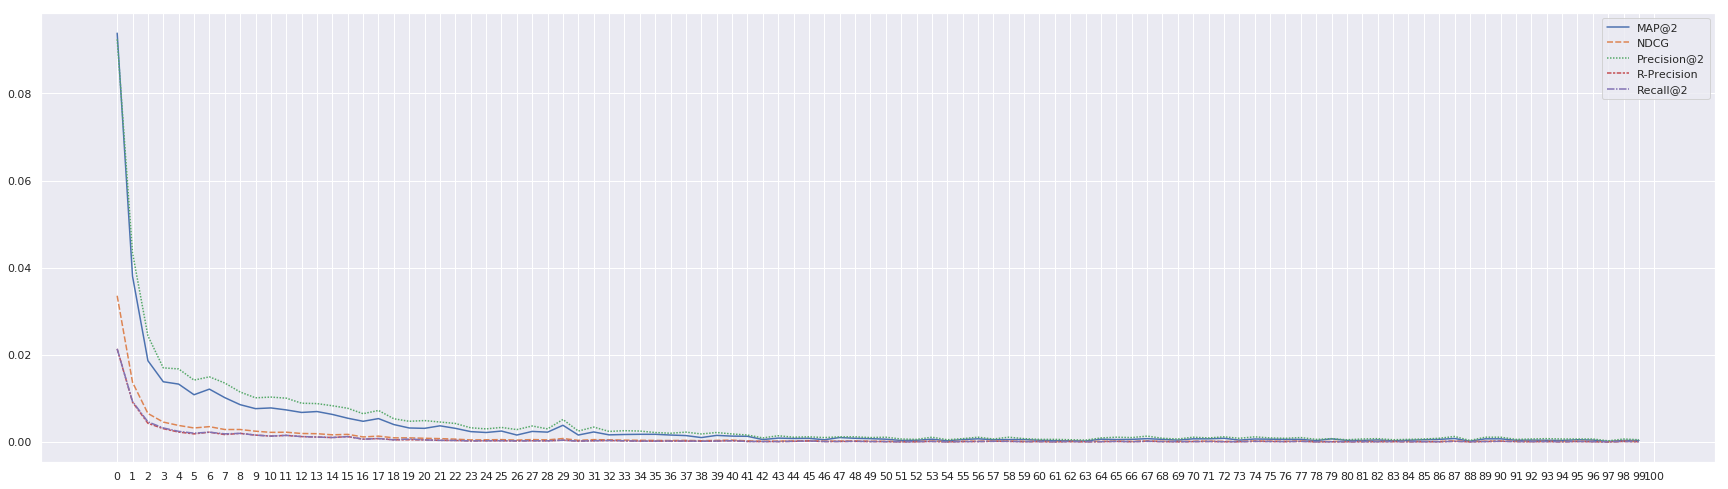

In [24]:
entropy_100_2_retrain_every_time_df = pd.read_pickle("entropy_100_2_retrain_every_time_df")
entropy_100_2_retrain_every_time_df.columns = ["Clicks", "MAP@2", "NDCG",
                                               "Num_Nonzero_In_Train", "Num_Nonzero_In_Valid",
                                               "Num_Unmasked_Negative", "Num_Unmasked_Positive",
                                               "Precision@2", "R-Precision", "Recall@2"]

entropy_100_2_retrain_every_time_df['MAP@2'] = entropy_100_2_retrain_every_time_df['MAP@2'].apply(lambda x: x[0])
entropy_100_2_retrain_every_time_df['NDCG'] = entropy_100_2_retrain_every_time_df['NDCG'].apply(lambda x: x[0])
entropy_100_2_retrain_every_time_df['Precision@2'] = entropy_100_2_retrain_every_time_df['Precision@2'].apply(lambda x: x[0])
entropy_100_2_retrain_every_time_df['R-Precision'] = entropy_100_2_retrain_every_time_df['R-Precision'].apply(lambda x: x[0])
entropy_100_2_retrain_every_time_df['Recall@2'] = entropy_100_2_retrain_every_time_df['Recall@2'].apply(lambda x: x[0])
entropy_100_2_retrain_every_time_df['Clicks'] = entropy_100_2_retrain_every_time_df['Clicks'].apply(lambda x: x[0])
entropy_100_2_retrain_every_time_df

fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)

ax = sns.lineplot(data=entropy_100_2_retrain_every_time_df[["MAP@2", "NDCG", "Precision@2", "R-Precision", "Recall@2"]])
ax.set(xticks=np.arange(0,101,1))

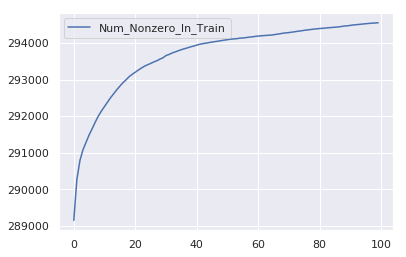

In [26]:
ax = sns.lineplot(data=entropy_100_2_retrain_every_time_df[["Num_Nonzero_In_Train"]])

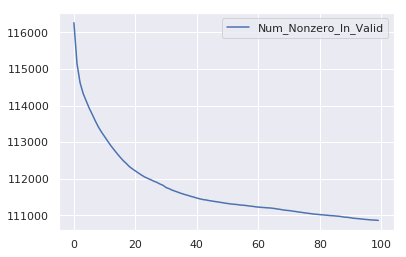

In [27]:
ax = sns.lineplot(data=entropy_100_2_retrain_every_time_df[["Num_Nonzero_In_Valid"]])

#                                                             , "Num_Unmasked_Positive",

In [ ]:
ax = sns.lineplot(data=entropy_100_2_retrain_every_time_df[["Num_Nonzero_In_Valid"]])